In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns




In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
def load_images(path):
    with open(path, 'rb') as f:
        # Read magic number (not used for data parsing directly)
        _ = int.from_bytes(f.read(4), 'big')
        num_images = int.from_bytes(f.read(4), 'big')
        num_rows = int.from_bytes(f.read(4), 'big')
        num_cols = int.from_bytes(f.read(4), 'big')

        # Read the image data
        data = np.frombuffer(f.read(num_images * num_rows * num_cols), dtype=np.uint8)
    return data.reshape(num_images, num_rows * num_cols)

In [8]:
def load_labels(path):
    with open(path, 'rb') as f:
        _ = int.from_bytes(f.read(4), 'big')
        num_items = int.from_bytes(f.read(4), 'big')
        labels = np.frombuffer(f.read(num_items), dtype=np.uint8)
    return labels

In [9]:
X_train = load_images('/content/train-images-idx3-ubyte')
y_train = load_labels('/content/train-labels-idx1-ubyte')

In [11]:
X_test = load_images('/content/t10k-images-idx3-ubyte')
y_test = load_labels('/content/t10k-labels-idx1-ubyte')

In [12]:
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
components = [2, 10, 30, 50]
explained_variances = []

for n in components:
    pca = PCA(n_components=n)
    pca.fit(X_train_scaled)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

explained_variances


[np.float64(0.09724988908210874),
 np.float64(0.2767081828674871),
 np.float64(0.45194655606697737),
 np.float64(0.5510539010352964)]

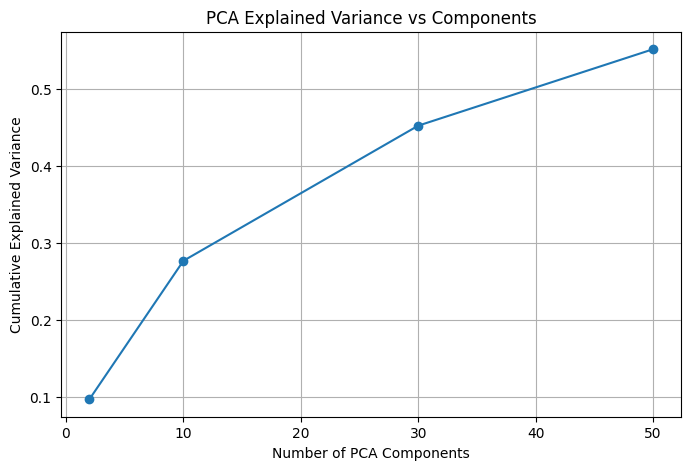

In [15]:
plt.figure(figsize=(8,5))
plt.plot(components, explained_variances, marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance vs Components")
plt.grid(True)
plt.show()


In [16]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(X_train_pca.shape)


(60000, 50)


In [17]:
lr_pca = LogisticRegression(max_iter=1000)
lr_pca.fit(X_train_pca, y_train)

y_pred_pca = lr_pca.predict(X_test_pca)
pca_accuracy = accuracy_score(y_test, y_pred_pca)


In [18]:
lr_original = LogisticRegression(max_iter=1000)
lr_original.fit(X_train_scaled, y_train)

y_pred_original = lr_original.predict(X_test_scaled)
original_accuracy = accuracy_score(y_test, y_pred_original)

print("Accuracy (Original Data):", original_accuracy)
print("Accuracy (PCA Reduced Data):", pca_accuracy)


Accuracy (Original Data): 0.9216
Accuracy (PCA Reduced Data): 0.9046


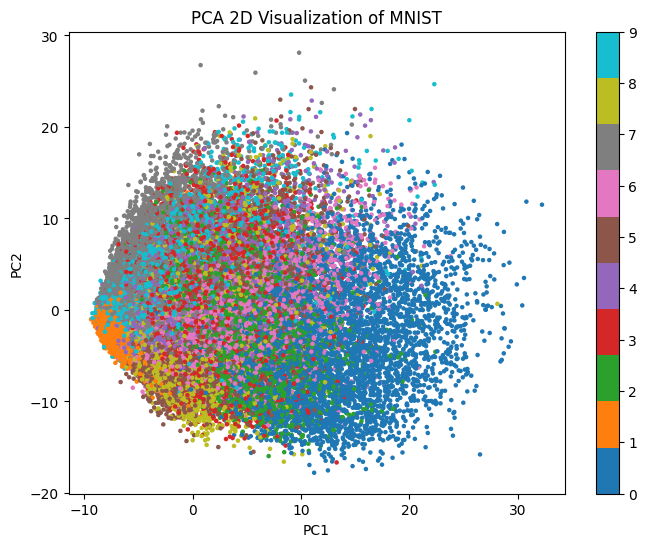

In [19]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=y_train, cmap='tab10', s=5)
plt.colorbar(scatter)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D Visualization of MNIST")
plt.show()


In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def load_images(path):
    with open(path, 'rb') as f:
        # Read magic number (not used for data parsing directly)
        _ = int.from_bytes(f.read(4), 'big')
        num_images = int.from_bytes(f.read(4), 'big')
        num_rows = int.from_bytes(f.read(4), 'big')
        num_cols = int.from_bytes(f.read(4), 'big')

        # Read the image data
        data = np.frombuffer(f.read(num_images * num_rows * num_cols), dtype=np.uint8)
    return data.reshape(num_images, num_rows * num_cols)

def load_labels(path):
    with open(path, 'rb') as f:
        _ = int.from_bytes(f.read(4), 'big')
        num_items = int.from_bytes(f.read(4), 'big')
        labels = np.frombuffer(f.read(num_items), dtype=np.uint8)
    return labels

# Load data
X_train = load_images('/content/train-images-idx3-ubyte')
y_train = load_labels('/content/train-labels-idx1-ubyte')

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# PCA reduction
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Save reduced dataset
columns = [f'PC{i+1}' for i in range(50)]
df = pd.DataFrame(X_pca, columns=columns)
df['label'] = y_train

df.to_csv('MNIST_PCA_Reduced_50.csv', index=False)

### Accuracy Comparison Report

*   **Accuracy (Original Data):** 0.9216
*   **Accuracy (PCA Reduced Data):** 0.9046

**Observation:**
The logistic regression model trained on the original, scaled MNIST data achieved an accuracy of **92.16%**. When trained on the PCA-reduced data (50 components), the accuracy dropped slightly to **90.46%**. This indicates that while PCA successfully reduced the dimensionality of the data, there was a small trade-off in predictive performance for this particular model configuration.